Localização, contagem e verificação da ausência/presença de figurinhas no álbum da copa
===
---

> Nome: Artur Starling Barbanti Duarte / RA: 191012114
>
> Nome: Nodyer Henrique Nakanishi dos Anjos / RA: 191012114

Ausência de figurinhas no álbum da copa
===
---

Importando as bibliotecas:

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Carregando a imagem:

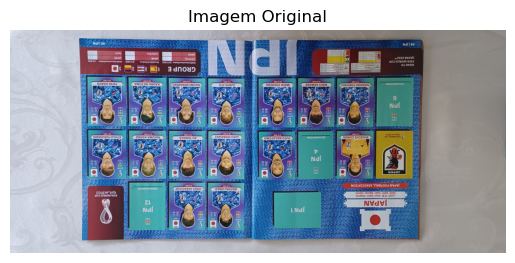

In [141]:
image = cv2.imread('20220917_170058.jpg')

plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)), plt.title("Imagem Original"), plt.axis('off')
plt.show()

De início, foi feito o redimensionamento para diminuir o número de pixels e facilitar o processamento da imagem. Além disso, também foi ajustado a rotação da imagem caso ela estivesse de "ponta-cabeça" ou na vertical.

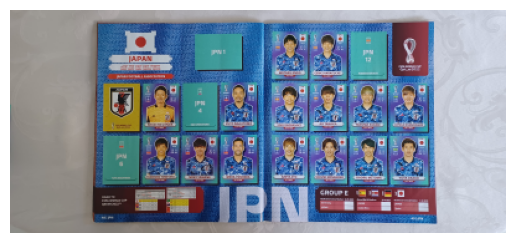

In [124]:
# Redimensionando o tamanho
scale_percent = 10
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

#Rotação da imagem
image = cv2.rotate(image, cv2.ROTATE_180)
if width < height:
    image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

A estratégia utilizada para atividade foi por meio da segmentação por cor. Portanto, é feito a transformação do modelo de cor BGR para RGB e HSV:

- RGB permite que a visualização da imagem com uso do `matplotlib`
- HSV foi o modelo escolhido para realizar a segmentação

In [125]:
# Convertendo a imagem em BGR para os modelos RGB e HSV
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

A segmentação por cor se baseia em restringir um determinado intervalo criando uma máscara e isolando o intervalo do resto das cores. Desse modo, é possível detectar as figurinhas faltantes por meio da cor do fundo. 

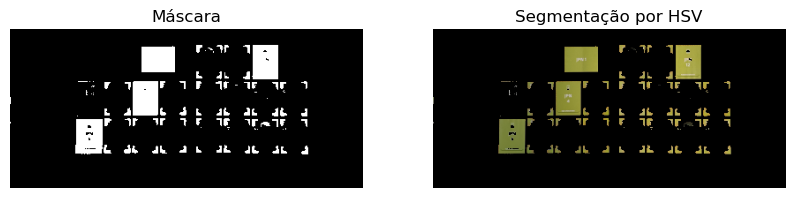

In [126]:
# Determinando o intervalo em HSV
lowcolor = (80, 0, 0) 
highcolor = (100, 255, 255)

# Formando a máscara e aplicando AND sobre a imagem
mask = cv2.inRange(imgHSV, lowcolor, highcolor)
result = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)), plt.title("Máscara"), plt.axis('off')
plt.subplot(122), plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB)), plt.title("Segmentação por HSV"), plt.axis('off')
plt.show()

Após a aplicação da máscara, nota-se que há presença de ruídos na imagem. Para diminuir, foi feito o processo de erosão para "corroer" os ruídos.

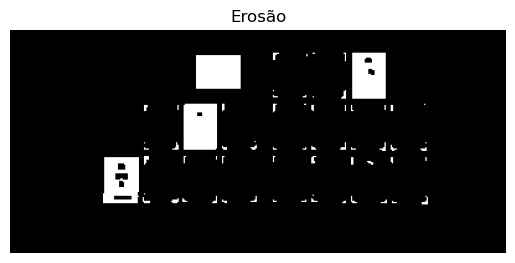

In [127]:
# Erosão na imagem segmentada
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(mask, kernel, iterations=1)

plt.imshow(img_erosion, 'gray'), plt.title("Erosão"), plt.axis('off')
plt.show()

Com esse resultado, é possível visualizar a detecção dos espaços ausentes de figurinhas no álbum. 

Para realizar a contagem, foi utilizado o BlobDetector. Ele se baseia na detecção de regiões que se destacam das regiões ao redor, por meio da diferença de cores ou iluminação. Assim, tomou-se como base as regiões binárias obtidas no processo anterior, sendo a região de interesse em branco e as demais em preto.

Entretanto, nem todos os ruídos foram filtrados com o processo de erosão. Desse modo, foi definido um tamanho necessário para a região ser detectada.

In [128]:
# Selecionando os parâmetros do BlobDetector
params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.minArea = 300
params.blobColor = 255
params.filterByInertia = False
params.filterByConvexity = False

# Criando o BlobDetector
detector = cv2.SimpleBlobDetector_create(params)

# Aplicando e desenhando na imagem o BlobDetector
keypoints = detector.detect(img_erosion)
im_with_keypoints = cv2.drawKeypoints(img_erosion, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Com isso, foi obtido o seguinte resultado com a contagem de figurinhas ausentes:

Número de figurinhas faltando:  4


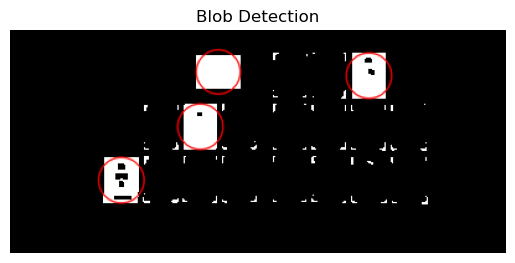

In [129]:
# Mostra o número de figurinhas faltando
print("Número de figurinhas faltando: ", len(keypoints))

# Exibição do resultado
plt.imshow(cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)), plt.title("Blob Detection"), plt.axis('off')
plt.show()

Abaixo é possível ver o resultado do código aplicado em todas as imagens.

Número de figurinhas faltando:  0


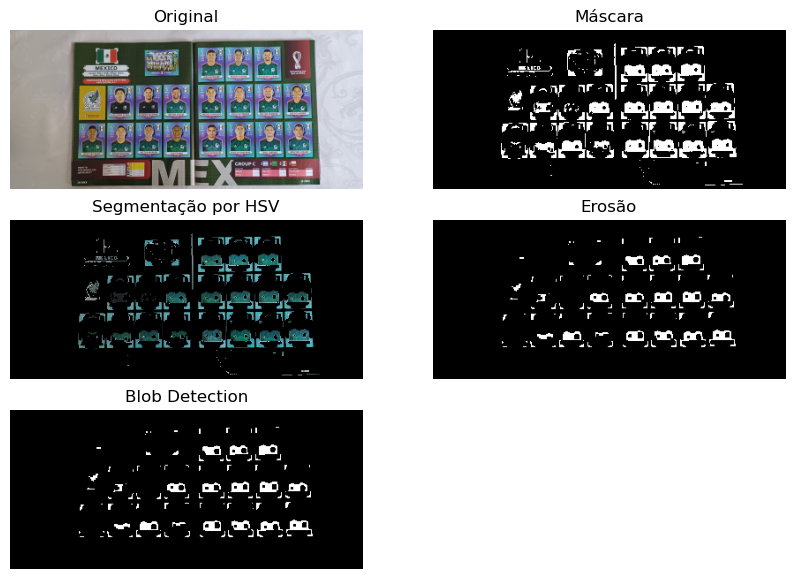

Número de figurinhas faltando:  6


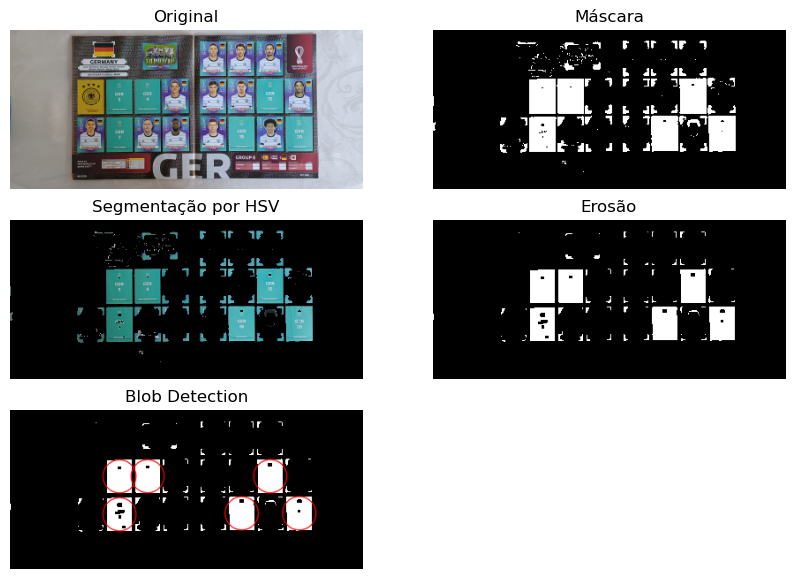

Número de figurinhas faltando:  4


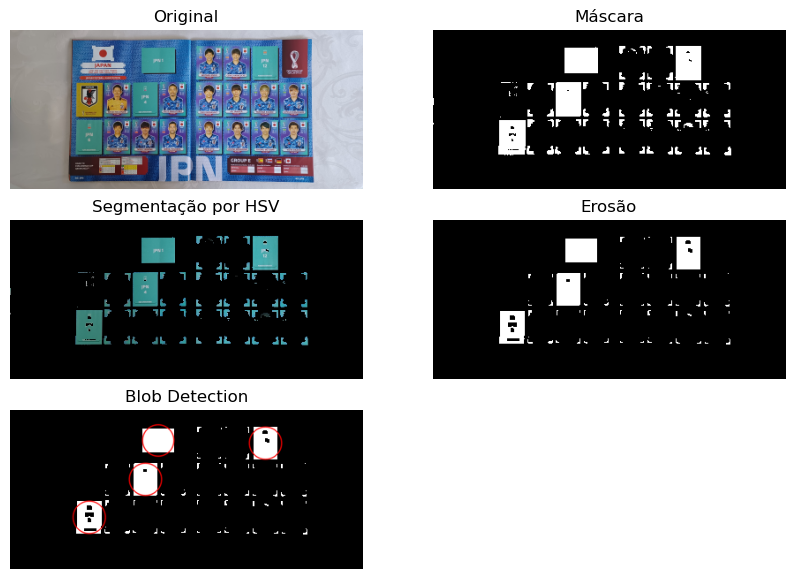

Número de figurinhas faltando:  5


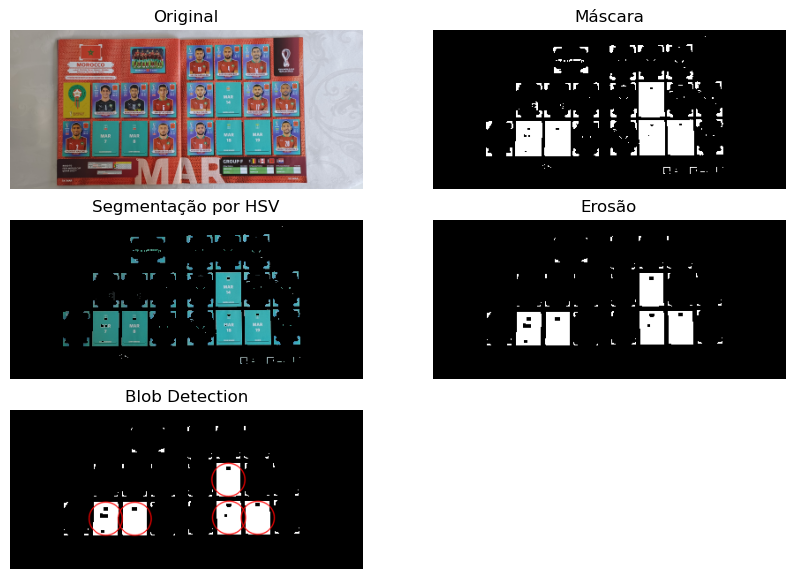

Número de figurinhas faltando:  0


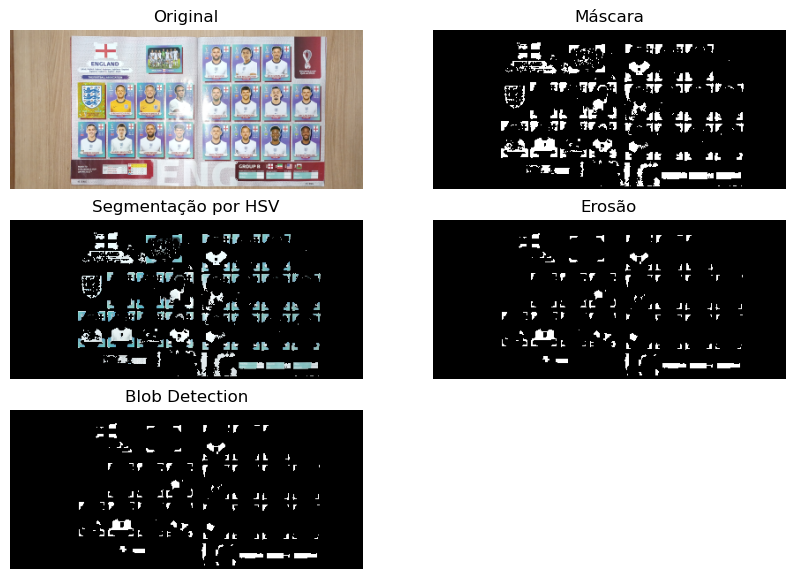

Número de figurinhas faltando:  0


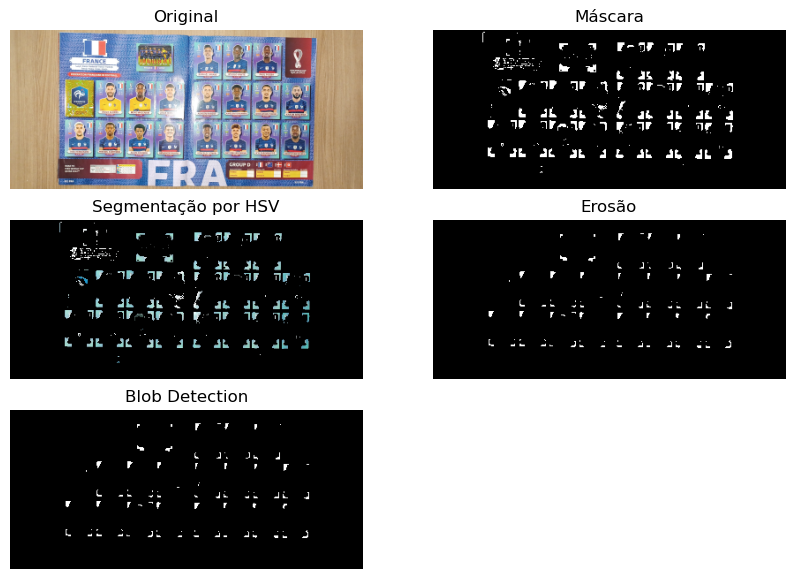

Número de figurinhas faltando:  0


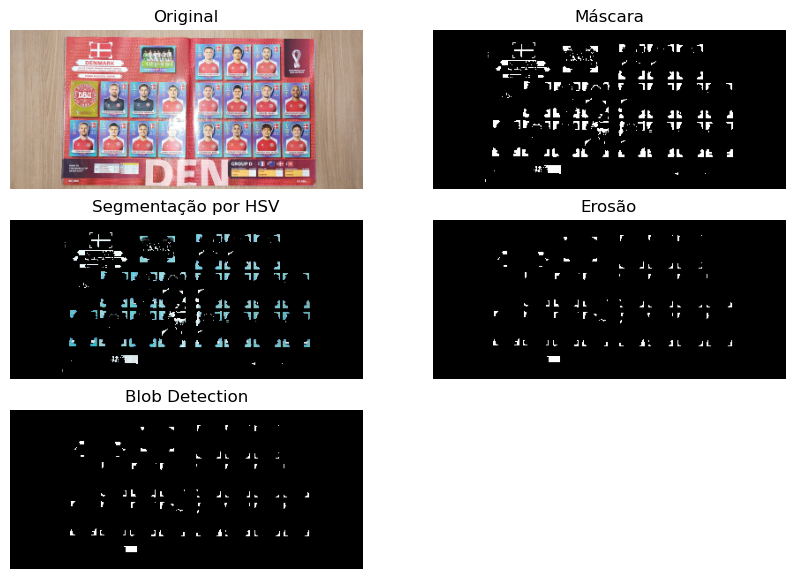

In [142]:
# Carregando a imagem
image_list = [  cv2.imread('20220917_165958.jpg'),
                cv2.imread('20220917_170052.jpg'),
                cv2.imread('20220917_170058.jpg'),
                cv2.imread('20220917_170119.jpg'),
                cv2.imread('20230120_120232.jpg'),
                cv2.imread('20230120_120303.jpg'),
                cv2.imread('20230120_120319.jpg')
]

for image in image_list:
    # Redimensionando o tamanho
    scale_percent = 10
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

    #Rotação da imagem
    image = cv2.rotate(image, cv2.ROTATE_180)
    if width < height:
        image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

    # Convertendo a imagem em BGR para os modelos RGB e HSV
    imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Determinando o intervalo em HSV
    lowcolor = (80, 0, 0) 
    highcolor = (100, 255, 255)

    # Formando a máscara e aplicando AND sobre a imagem
    mask = cv2.inRange(imgHSV, lowcolor, highcolor)
    result = cv2.bitwise_and(imgRGB, imgRGB, mask=mask)

    # Erosão na imagem segmentada
    kernel = np.ones((3, 3), np.uint8)
    img_erosion = cv2.erode(mask, kernel, iterations=1)

    # Selecionando os parâmetros do BlobDetector
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = 250
    params.blobColor = 255
    params.filterByInertia = False
    params.filterByConvexity = False

    # Criando o BlobDetector
    detector = cv2.SimpleBlobDetector_create(params)
    
    # Aplicando e desenhando na imagem o BlobDetector
    keypoints = detector.detect(img_erosion)
    im_with_keypoints = cv2.drawKeypoints(img_erosion, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Mostra o número de figurinhas faltando
    print("Número de figurinhas faltando: ", len(keypoints))

    #Exibição dos resultados
    plt.figure(figsize=(10,7))
    plt.subplot(321), plt.imshow(imgRGB), plt.title("Original"), plt.axis('off')
    plt.subplot(322), plt.imshow(mask, 'gray'), plt.title("Máscara"), plt.axis('off')
    plt.subplot(323), plt.imshow(result), plt.title("Segmentação por HSV"), plt.axis('off')
    plt.subplot(324), plt.imshow(img_erosion, 'gray'), plt.title("Erosão"), plt.axis('off')
    plt.subplot(325), plt.imshow(cv2.cvtColor(im_with_keypoints,cv2.COLOR_BGR2RGB)), plt.title("Blob Detection"), plt.axis('off')
    plt.show()

### Comentários Finais

Não foi alcançado o objetivo de detectar todos os espaços de figurinhas no álbum da copa. As estratégias estimadas seria o uso de detecção de retângulos presentes na imagem e, com isso, a contagem deles. 